<a href="https://colab.research.google.com/github/Marwa-Chouhdary/Data-Science-Projects/blob/main/Netflix_Content_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Netflix Content Analysis


##Load & Explore the Dataset

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('netflix_titles.csv')


In [2]:
# Quick overview
print(df.shape)
print(df.columns)
print(df.isnull().sum())  # check missing data
df.head()

(8807, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##Clean the Dataset

In [3]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [4]:
# Drop rows with missing 'type', 'release_year', or 'listed_in'
df.dropna(subset=['type', 'release_year', 'listed_in'], inplace=True)


In [16]:
# Fill missing values for description or country with placeholders if needed
df['description'] = df['description'].fillna("No Description")
df['country'] = df['country'].fillna("Unknown")



##Content Type Analysis

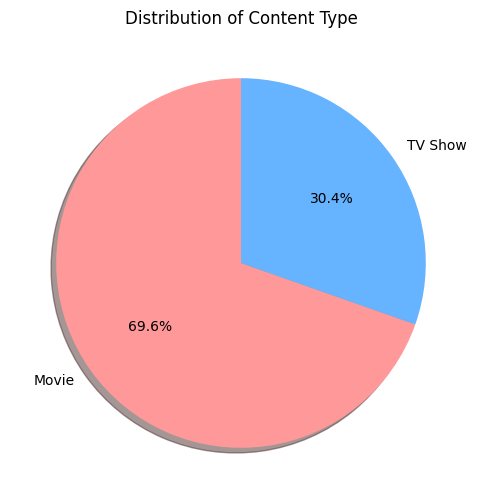

In [6]:
import matplotlib.pyplot as plt

# Count of Movies vs TV Shows
type_counts = df['type'].value_counts()

# Pie Chart
plt.figure(figsize=(6,6))
type_counts.plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, colors=['#FF9999','#66B3FF'])
plt.title('Distribution of Content Type')
plt.ylabel('')
plt.show()


##Content Over the Years

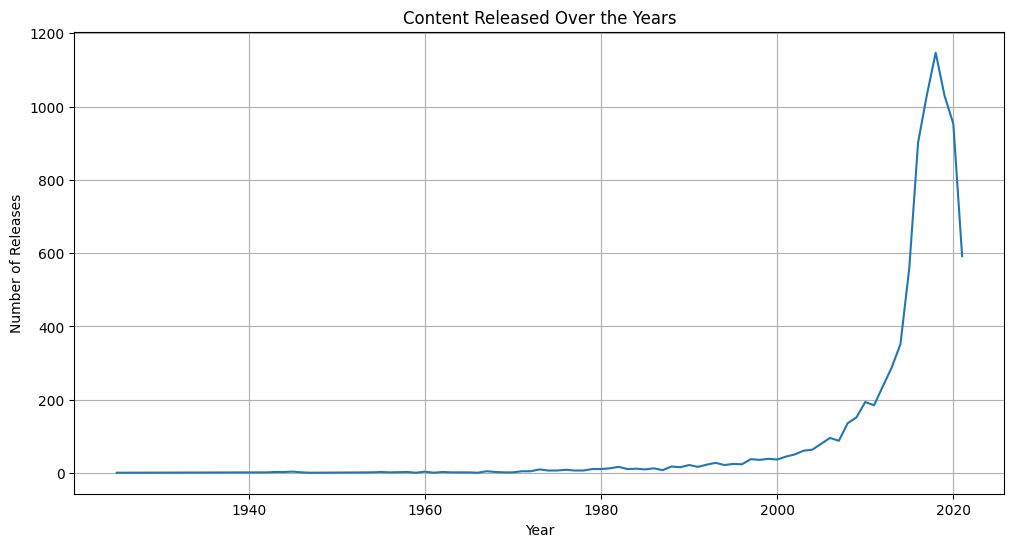

In [7]:
# Number of titles released per year
plt.figure(figsize=(12,6))
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Content Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()


##Most Common Genres

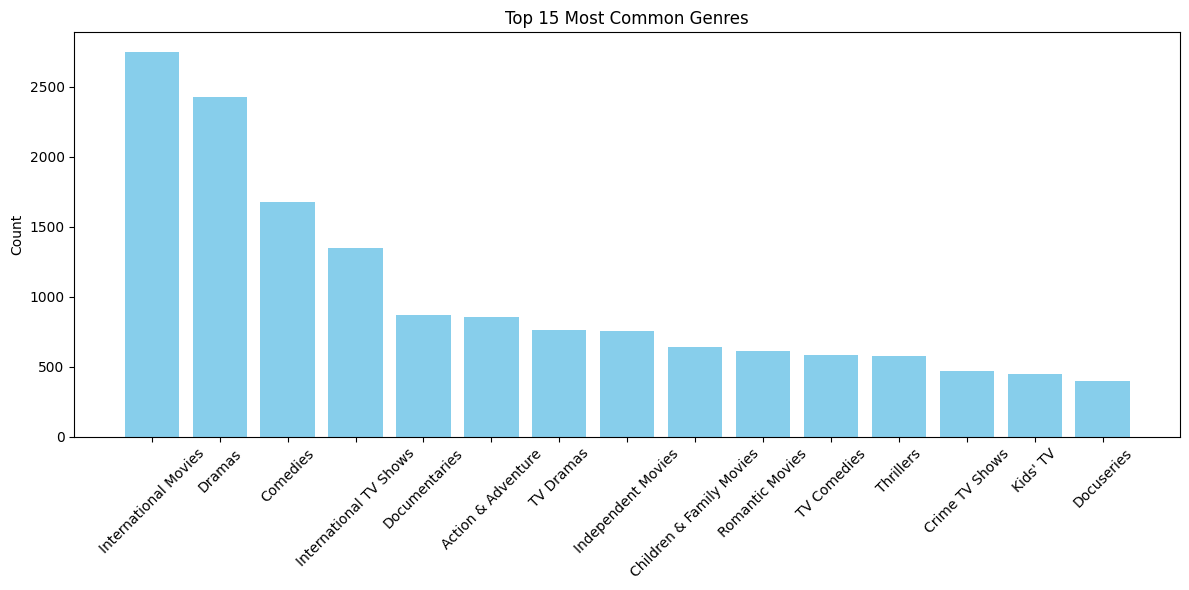

In [8]:
from collections import Counter

# Split all genres into a flat list
all_genres = ','.join(df['listed_in']).split(',')

# Clean and count
genre_counts = Counter([genre.strip() for genre in all_genres])

# Top 15 genres
top_genres = dict(genre_counts.most_common(15))

# Bar chart
plt.figure(figsize=(12,6))
plt.bar(top_genres.keys(), top_genres.values(), color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 15 Most Common Genres')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##Top Directors with Most Content

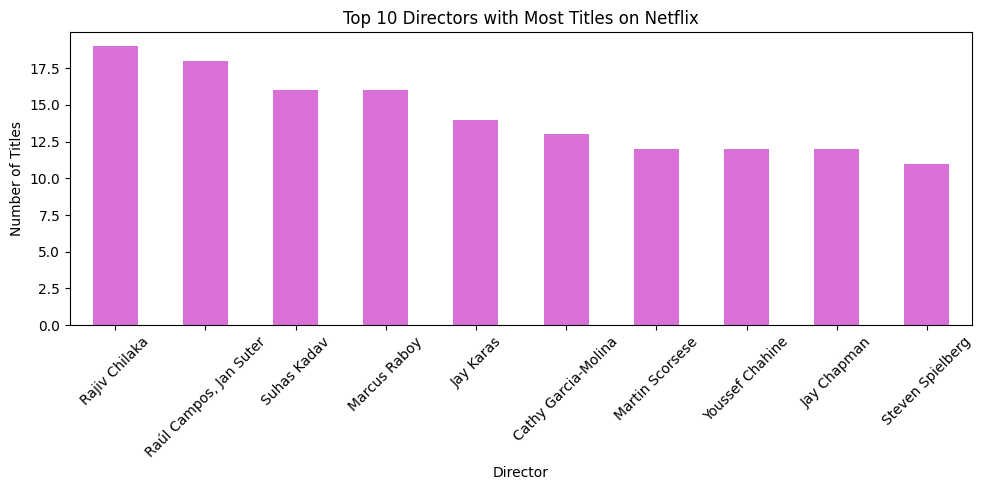

In [10]:
# Drop missing directors
df_directors = df.dropna(subset=['director'])

# Count occurrences
top_directors = df_directors['director'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
top_directors.plot(kind='bar', color='orchid')
plt.title('Top 10 Directors with Most Titles on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Country-wise Content Distribution

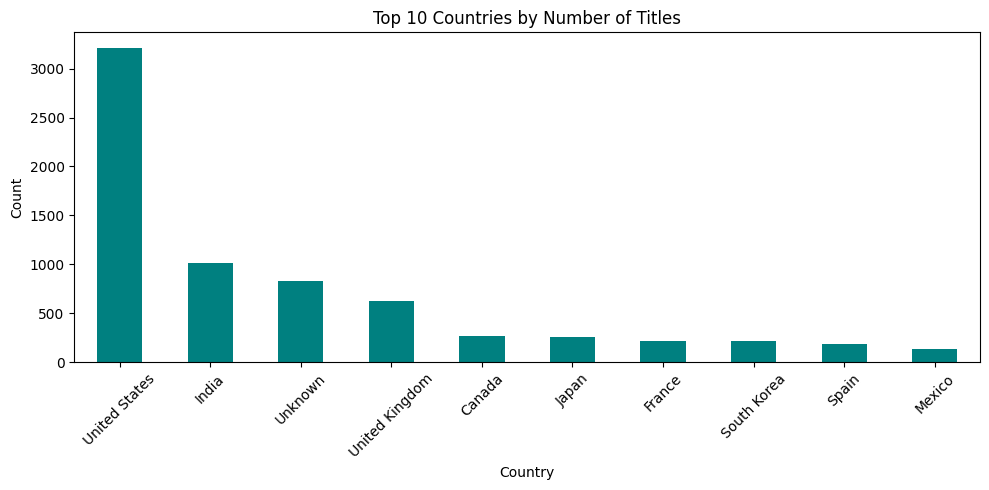

In [11]:
# Fill missing country with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Split by comma and take the first country
df['main_country'] = df['country'].apply(lambda x: x.split(',')[0].strip())

top_countries = df['main_country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
top_countries.plot(kind='bar', color='teal')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Rating Category Breakdown

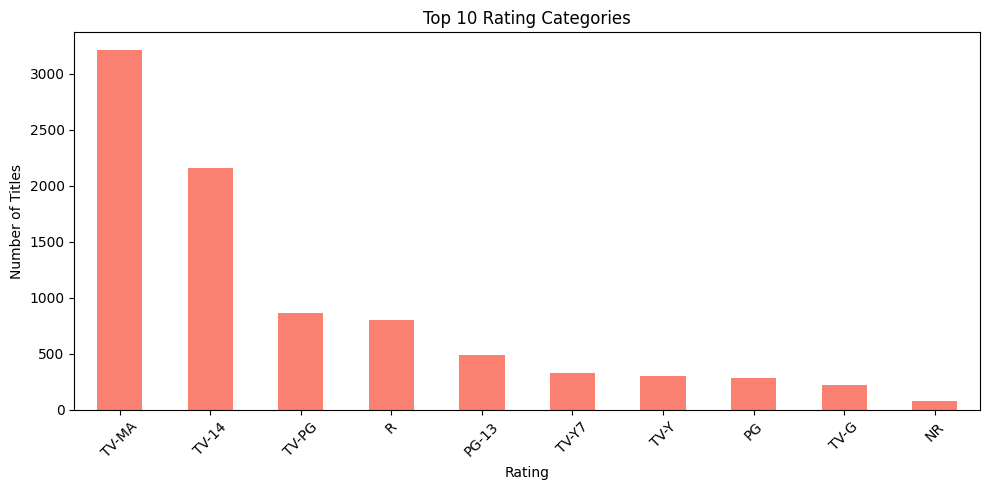

In [12]:
# Fill missing ratings
df['rating'] = df['rating'].fillna('Unknown')

# Count
rating_counts = df['rating'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
rating_counts.plot(kind='bar', color='salmon')
plt.title('Top 10 Rating Categories')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Seasonal Trends: Titles Added by Month

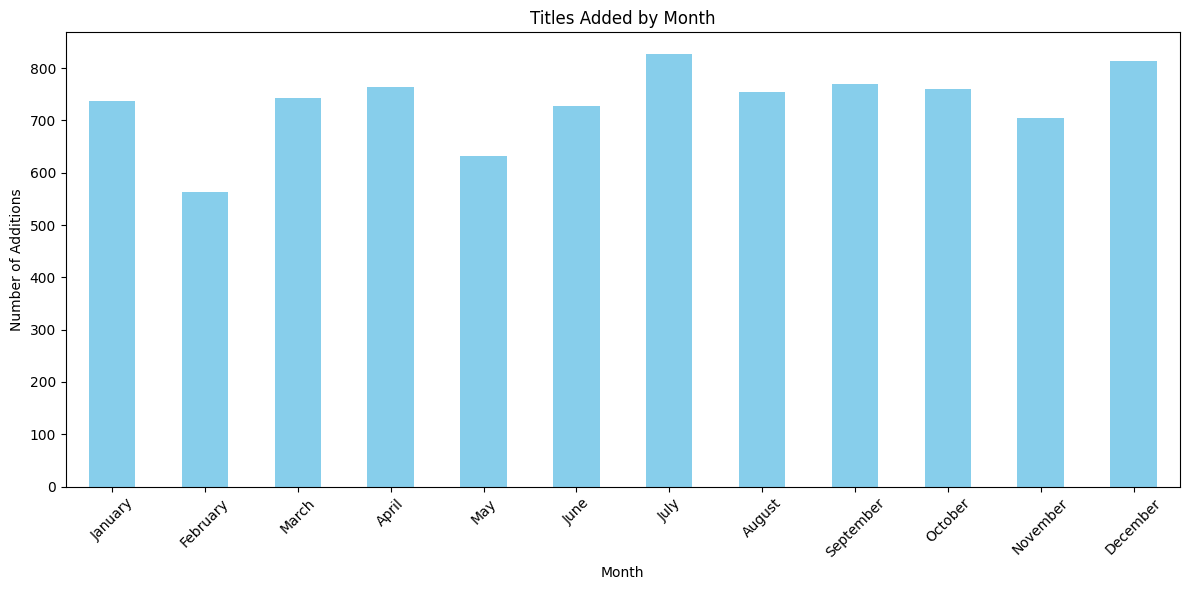

In [15]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

# Extract month names
df['month_added'] = df['date_added'].dt.month_name()

# Drop rows with no date
df_month = df.dropna(subset=['month_added'])

# Count by month
monthly_counts = df_month['month_added'].value_counts()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Reorder for better visuals
monthly_counts = monthly_counts.reindex(month_order)

# Plot
plt.figure(figsize=(12,6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Titles Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Additions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##WordCloud of Titles

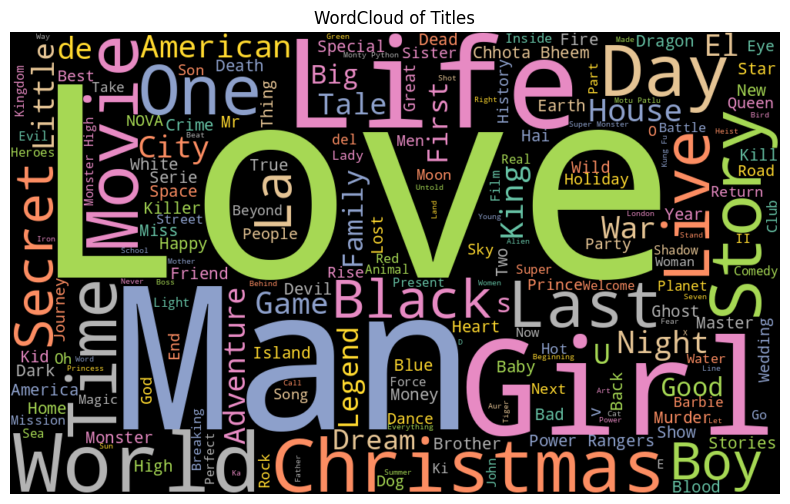

In [9]:
from wordcloud import WordCloud

titles = ' '.join(df['title'].dropna())

wordcloud = WordCloud(background_color='black', width=1000, height=600, colormap='Set2').generate(titles)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Titles')
plt.show()
